In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("hiring.csv")
# experience to exp, test_score(out of 10) to test_score, interview_score(out of 10) to interview_score, salary($) to salary
df.columns = ['exp', 'test_score', 'interview_score', 'salary']
df

,exp,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df.exp = df.exp.fillna("zero")
df

,exp,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
import word2number.w2n as w2n
df.exp = df.exp.apply(w2n.word_to_num)
df

,exp,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [5]:
df.test_score = df.test_score.fillna(df.test_score.median())
df

,exp,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [6]:
df.salary = df.salary.apply(lambda x: x/1000)
df

,exp,test_score,interview_score,salary
0,0,8.0,9,50.0
1,0,8.0,6,45.0
2,5,6.0,7,60.0
3,2,10.0,10,65.0
4,7,9.0,6,70.0
5,3,7.0,10,62.0
6,10,8.0,7,72.0
7,11,7.0,8,80.0


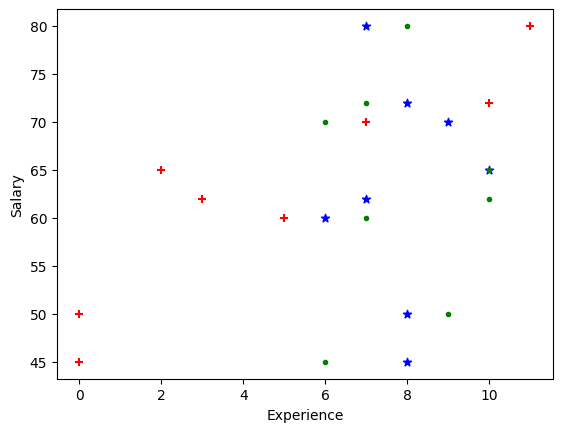

In [8]:
%matplotlib inline
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(df.exp, df.salary, color='red', marker='+')
plt.scatter(df.test_score, df.salary, color='blue', marker='*')
plt.scatter(df.interview_score, df.salary, color='green', marker='.')

In [9]:
reg = linear_model.LinearRegression()
reg.fit(df[['exp', 'test_score', 'interview_score']], df.salary)

LinearRegression()

In [10]:
reg.coef_ , reg.intercept_

(array([2.81295488, 1.84570597, 2.20524017]), 17.73726346433771)

In [11]:
reg.predict([[2, 9, 6]])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53.20596798])

In [12]:
reg.predict([[12, 10, 10]])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.00218341])